![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


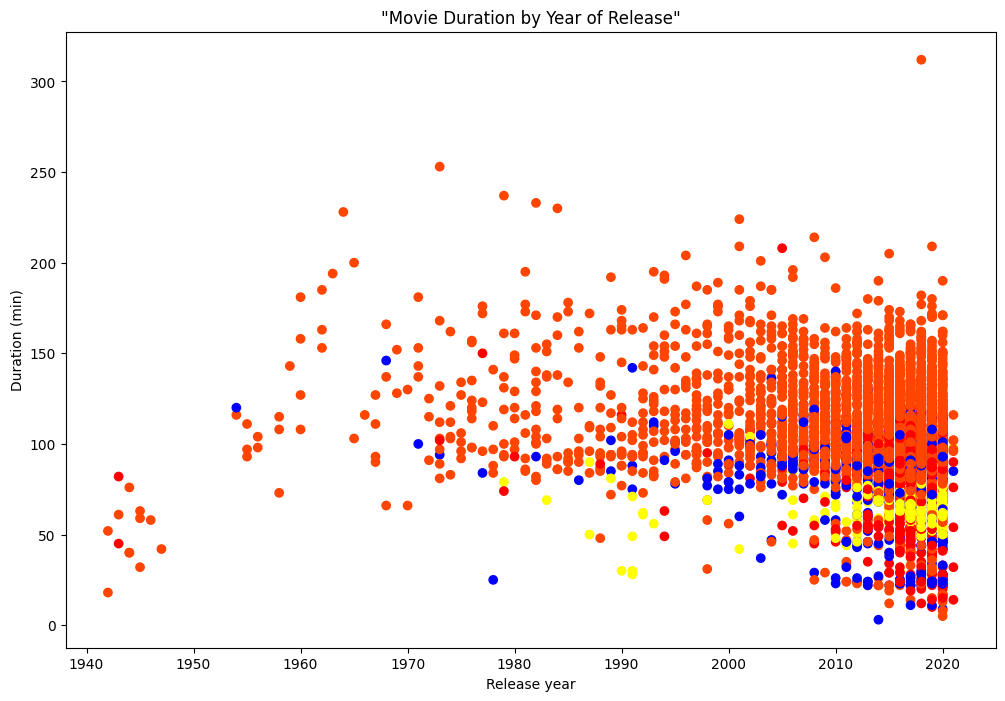

In [165]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
# Load csv file and explore data
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.info()

# Filter data to remove TV shows and keep Movie
netflix_subset = netflix_df[~netflix_df['type'].isin(['TV Show'])]

# Investigate Netflix movie data, keeping the right columns in a new df subset
netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]

# Filter netflix_movies to find movies shorter than 60 min and find possible contributing factors
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.sort_values(by=['duration','genre'],ascending=[False,True])
short_movies.groupby(['genre'])['duration'].count().sort_values(ascending = False)

# Iterate through subset and assign colors for genre groups ('Children','Documentaries','Stand-Up',Others).
colors = []
for i in netflix_movies['genre']:
    if i == 'Documentaries':
        colors.append('red')
    elif i == 'Children':
        colors.append('blue')
    elif i == 'Stand-Up':
        colors.append('yellow')
    else:
        colors.append('orangered')

# Create a scater plot for movie duration by release year using colors
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.title('Movie Duration by Year of Release')
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

# Are we certain that movies are getting shorter? maybe for some categories like children category
answer = "maybe"

In [166]:
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies


In [167]:
# Filter data to remove TV shows and keep Movie
netflix_subset = netflix_df[~netflix_df['type'].isin(['TV Show'])]
netflix_subset

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [168]:
# Investigate Netflix movie data, keeping the right columns in a new df subset
netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]
netflix_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [169]:
# Filter netflix_movies to find movies shorter than 60 min and find possible contributing factors
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.sort_values(by=['duration','genre'],ascending=[False,True])
short_movies.groupby(['genre'])['duration'].count().sort_values(ascending = False)


genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
Anime Features            3
International Movies      3
Music                     2
Horror Movies             1
Name: duration, dtype: int64

In [170]:
# Iterate through subset and assign colors for genre groups ('Children','Documentaries','Stand-Up',Others).
colors = []
for i in netflix_movies['genre']:
    if i == 'Documentaries':
        colors.append('red')
    elif i == 'Children':
        colors.append('blue')
    elif i == 'Stand-Up':
        colors.append('yellow')
    else:
        colors.append('orangered')
print(colors)

    
    

['orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'red', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'red', 'orangered', 'oran

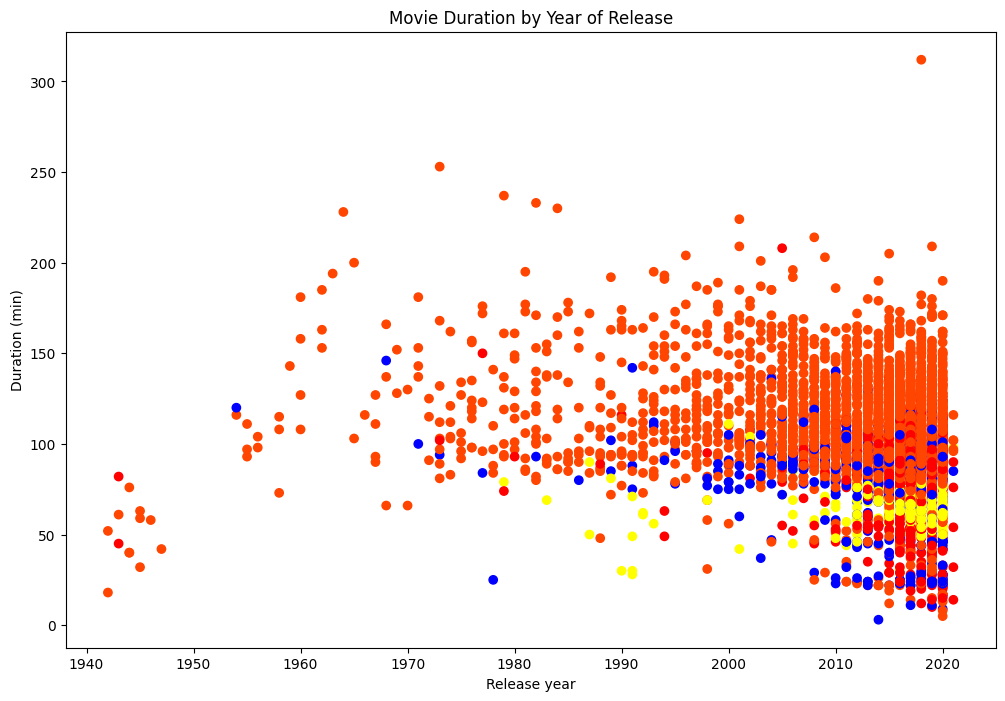

In [171]:
# Create a scater plot for movie duration by release year using colors
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.title('Movie Duration by Year of Release')
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()
